In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import my_RNN

In [2]:
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))


batch_size, num_steps, n_train = 16,8,600
train_iter,vocab = my_RNN.load_x_data(x[:n_train],batch_size,num_steps),1

In [3]:
num_hiddens = 32
rnn_layer = nn.RNN(vocab, num_hiddens)

In [4]:
net = my_RNN.RNNModel(rnn_layer, vocab_size=vocab)
prefix=torch.tensor([1.0,2.0,3.0],dtype=torch.float32)
my_RNN.predict(prefix, 10, net, vocab)

[tensor(1.),
 tensor(2.),
 tensor(3.),
 tensor([[0.0486]], grad_fn=<AddmmBackward0>),
 tensor([[-0.1127]], grad_fn=<AddmmBackward0>),
 tensor([[0.1461]], grad_fn=<AddmmBackward0>),
 tensor([[0.2317]], grad_fn=<AddmmBackward0>),
 tensor([[0.2314]], grad_fn=<AddmmBackward0>),
 tensor([[0.2159]], grad_fn=<AddmmBackward0>),
 tensor([[0.2142]], grad_fn=<AddmmBackward0>),
 tensor([[0.2146]], grad_fn=<AddmmBackward0>),
 tensor([[0.2162]], grad_fn=<AddmmBackward0>),
 tensor([[0.2170]], grad_fn=<AddmmBackward0>)]

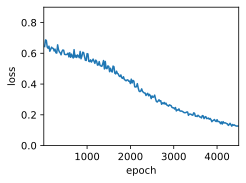

In [5]:
num_epochs, lr = 4500, 1e-5
my_RNN.train(net, train_iter, vocab, lr, num_epochs)
